# Projeto da disciplina de Modelagem Preditiva e Descritiva I - UFPE

Tadao Ando Junior (tjunior@atech.com.br)

## Preparação do ambiente

In [126]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request
import os.path

# Carga do arquivo no formato arff
from scipy.io.arff import loadarff 

# Préprocessamento de atributos categóricos
from sklearn.preprocessing import OneHotEncoder

# Seleção de test/train sets
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import StratifiedKFold

# Busca exaustiva por parametros em ranges especificados
from sklearn.model_selection import GridSearchCV

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# Métricas
from sklearn.metrics import classification_report, plot_roc_curve, accuracy_score, f1_score, recall_score, confusion_matrix
from yellowbrick.classifier import ROCAUC

# Visualização
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [16]:
# Define tamanho padrão dos plotes
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 18]

## Carga do banco de dados

In [54]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

# Verifica se estamos rodando dentro do GoogleCollab
if IN_COLAB:
        print('Loading dataset from github tadj8/mpd')
        dataset_name = 'collins.arff'

        # Se o arquivo já foi baixado não é necessário baixar novamente
        if not os.path.isfile(dataset_name):
                urllib.request.urlretrieve("https://raw.githubusercontent.com/tadj8/mpd/main/datasets/collins.arff", dataset_name)
        raw_data = loadarff("collins.arff")
else:
        print('Reading dataset from local file')
        raw_data = loadarff("datasets/collins.arff")

# Converte dados brutos para um dataframe pandas
df_orig = pd.DataFrame(raw_data[0])

Reading dataset from local file


In [31]:
df_orig

,Text,FirstPerson,InnerThinking,ThinkPositive,ThinkNegative,ThinkAhead,ThinkBack,Reasoning,Share_SocTies,Direct_Activity,...,SpaceInterval,Motion,PastEvents,TimeInterval,ShiftingEvents,Text_Coverage,Genre,Counter,Corpus,Corp.Genre
0,b'A01.TXT',0.09,1.72,0.62,0.70,2.15,0.66,1.23,2.24,0.48,...,0.75,0.35,2.55,1.63,0.79,28.31,b'1',1.0,b'1',b'101'
1,b'A02.TXT',0.13,1.48,0.38,0.63,1.85,0.93,1.48,2.28,0.21,...,0.59,0.25,1.77,1.39,0.80,23.91,b'1',2.0,b'1',b'101'
2,b'A03.TXT',0.04,1.72,0.34,1.12,1.55,0.90,1.68,2.84,0.17,...,0.65,0.17,2.32,1.94,0.82,30.15,b'1',3.0,b'1',b'101'
3,b'A04.TXT',0.00,2.74,0.90,2.43,1.21,1.03,3.46,3.06,0.22,...,0.67,0.09,1.89,1.71,0.81,29.43,b'1',4.0,b'1',b'101'
4,b'A05.TXT',0.26,2.15,0.39,0.61,2.28,0.75,1.93,1.84,0.44,...,0.75,0.35,1.54,1.80,0.96,27.89,b'1',5.0,b'1',b'101'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'rFR5.txt',0.49,3.25,0.41,2.10,1.07,0.25,3.29,1.93,1.65,...,0.70,0.90,1.19,1.77,1.07,34.11,b'15',996.0,b'2',b'215'
996,b'rFR6.txt',5.17,4.86,1.08,0.99,1.26,0.45,3.51,1.17,0.00,...,1.26,0.18,1.35,1.08,1.26,38.95,b'15',997.0,b'2',b'215'
997,b'rFR7.txt',0.00,2.70,1.30,1.21,1.21,1.30,2.16,1.35,0.18,...,1.08,0.31,5.13,1.71,1.08,40.36,b'15',998.0,b'2',b'215'
998,b'rFR8.txt',0.73,1.96,0.41,0.37,1.06,0.65,2.04,0.86,0.08,...,3.02,1.02,4.41,0.61,0.41,42.53,b'15',999.0,b'2',b'215'


In [63]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Text             1000 non-null   object 
 1   FirstPerson      1000 non-null   float64
 2   InnerThinking    1000 non-null   float64
 3   ThinkPositive    1000 non-null   float64
 4   ThinkNegative    1000 non-null   float64
 5   ThinkAhead       1000 non-null   float64
 6   ThinkBack        1000 non-null   float64
 7   Reasoning        1000 non-null   float64
 8   Share_SocTies    1000 non-null   float64
 9   Direct_Activity  1000 non-null   float64
 10  Interacting      1000 non-null   float64
 11  Notifying        1000 non-null   float64
 12  LinearGuidance   1000 non-null   float64
 13  WordPicture      1000 non-null   float64
 14  SpaceInterval    1000 non-null   float64
 15  Motion           1000 non-null   float64
 16  PastEvents       1000 non-null   float64
 17  TimeInterval   

### Preparação e análise do dataset

In [115]:
df = df_orig.copy()
df = df_orig.loc[df_orig['Corpus'] == b'1'] 

# Nosso target:
#    Corp.Genre : Combinação do Gênero (atribuído pelos compiladores do corpora) e corpus (1=Brown e 2=Frown)

# Gênero é categórica e não tem ordinalidade entre as classes. Portanto, decidimos usar OneHotEncoding para transformar
# em numérica:
# df = df.join(pd.get_dummies(df['Genre'], prefix='genre'))
df['Corp.Genre'] = df['Corp.Genre'].factorize()[0]

# Remove colunas que não utilizaremos:
#   Genre / Corpus : As duas colunas juntas são o target e já estão combinadas em Corp.Genre, portanto podem ser removidas
#   Text : nome do texto de origem
#
df.drop(['Text', 'Corpus', 'Counter', 'Genre'], axis=1, inplace=True)

In [116]:
df

,FirstPerson,InnerThinking,ThinkPositive,ThinkNegative,ThinkAhead,ThinkBack,Reasoning,Share_SocTies,Direct_Activity,Interacting,Notifying,LinearGuidance,WordPicture,SpaceInterval,Motion,PastEvents,TimeInterval,ShiftingEvents,Text_Coverage,Corp.Genre
0,0.09,1.72,0.62,0.70,2.15,0.66,1.23,2.24,0.48,0.00,2.11,5.23,5.01,0.75,0.35,2.55,1.63,0.79,28.31,0
1,0.13,1.48,0.38,0.63,1.85,0.93,1.48,2.28,0.21,0.17,1.77,3.46,4.34,0.59,0.25,1.77,1.39,0.80,23.91,0
2,0.04,1.72,0.34,1.12,1.55,0.90,1.68,2.84,0.17,0.17,2.84,5.03,5.85,0.65,0.17,2.32,1.94,0.82,30.15,0
3,0.00,2.74,0.90,2.43,1.21,1.03,3.46,3.06,0.22,0.31,2.47,3.15,3.28,0.67,0.09,1.89,1.71,0.81,29.43,0
4,0.26,2.15,0.39,0.61,2.28,0.75,1.93,1.84,0.44,0.35,2.54,5.79,3.16,0.75,0.35,1.54,1.80,0.96,27.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.47,2.29,0.86,0.94,0.57,0.45,2.86,1.47,0.37,1.59,2.37,9.19,6.17,0.94,0.41,2.94,1.10,1.14,37.13,14
496,1.77,2.46,0.81,2.13,0.97,0.16,2.13,1.37,0.20,1.41,3.10,7.37,3.38,1.17,0.64,2.01,0.89,1.05,33.02,14
497,1.15,3.62,2.18,1.11,0.90,0.99,2.80,1.23,0.16,1.27,2.26,10.07,4.44,1.36,1.15,3.95,0.74,1.36,40.74,14
498,0.55,2.90,1.26,1.68,0.59,0.42,2.15,1.81,0.04,0.29,2.52,3.87,5.47,1.35,0.59,0.93,1.47,0.88,28.77,14


In [117]:
# Cria um dicionario com o mapeamento entre os valores originais e os fatorizados e vice-versa para consulta posterior
orig_to_ordinal={}
ordinal_to_orig={}
keys=list(df_orig['Corp.Genre'].unique())

for i in range(0,30):
        orig_to_ordinal[keys[i]] = i
        ordinal_to_orig[i]=keys[i]

In [118]:
# Identificando valores ordenados pela frequencia
df['Corp.Genre'].value_counts().sort_values()

11     6
14     9
2     17
3     17
10    24
1     27
9     29
12    29
13    29
7     30
4     36
0     44
5     48
6     75
8     80
Name: Corp.Genre, dtype: int64

In [87]:
# Gera profile do dataset com pandas_profiling (não consegui rodar isso no google collab, somente localmente)
# O relatório pode ser visto com um browser

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file('report_corpus.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


## Experimentos

In [160]:
import functools

# Função de análise usando kfold + gridsearch
def grid_search(skf, model, parameters, X, y):
      accuracies_list = []
      f1score_list = []
      recall_list = []
      cm_list = []

      fold = 0

      for train, test in skf.split(X, y):
            X_train, X_test = X.iloc[train], X.iloc[test]
            y_train, y_test = y.iloc[train], y.iloc[test]
    
            grid = GridSearchCV(estimator = model,
                    param_grid = parameters,
                    scoring = 'accuracy',
                    cv = 5)
        
            grid.fit(X_train, y_train)

            y_pred = grid.predict(X_test)
    
            print("Best params:", grid.best_params_)         
            print("Fold %d: %.3f" %(fold, accuracy_score(y_test, y_pred)))
            
            accuracies_list.append(accuracy_score(y_test, y_pred))
            f1score_list.append(f1_score(y_test, y_pred, average='micro'))
            recall_list.append(recall_score(y_test, y_pred, average='micro'))
            cm_list.append(confusion_matrix(y_test, y_pred))
            fold += 1

      accuracies = np.array(accuracies_list)
      f1score = np.array(f1score_list)
      recall = np.array(recall_list)

      # Calcula confusion matrix média
      cm_mean = functools.reduce(lambda a,b: a+b, cm_list) / len(cm_list)

      # Calcula stdev por elementos das confusion matrices
      partial = np.copy(cm_list[0])
      partial.fill(0)
      for i in cm_list:
            partial = partial + pow(i - cm_mean,2)

      partial = partial / len(cm_list)
      cm_std = pow(partial, 0.5)

      print("")
      print("Precision  : %.3f +- (%.3f)" %(accuracies.mean(), accuracies.std()))
      print("F1-score   : %.3f +- (%.3f)" %(f1score.mean(), f1score.std()))
      print("Recall     : %.3f +- (%.3f)" %(recall.mean(), recall.std()))
      print("Best params: %s" % (grid.best_params_))

      sb.heatmap(cm_mean, annot=True, annot_kws={"size": 16}, cmap="gray_r" )
      plt.xlabel("Predicted Label")
      plt.ylabel("True Label")
      plt.show()

      return pd.DataFrame(grid.cv_results_)


In [154]:
# Define semente padrão para geradores de números pseudo-aleatórios
default_seed = 2022

### kNN

Best params: {'n_neighbors': 30, 'weights': 'distance'}
Fold 0: 0.419
Best params: {'n_neighbors': 30, 'weights': 'distance'}
Fold 1: 0.383
Best params: {'n_neighbors': 20, 'weights': 'distance'}
Fold 2: 0.398

Precision  : 0.400 +- (0.015)
F1-score   : 0.400 +- (0.015)
Recall     : 0.400 +- (0.015)
Best params: {'n_neighbors': 20, 'weights': 'distance'}


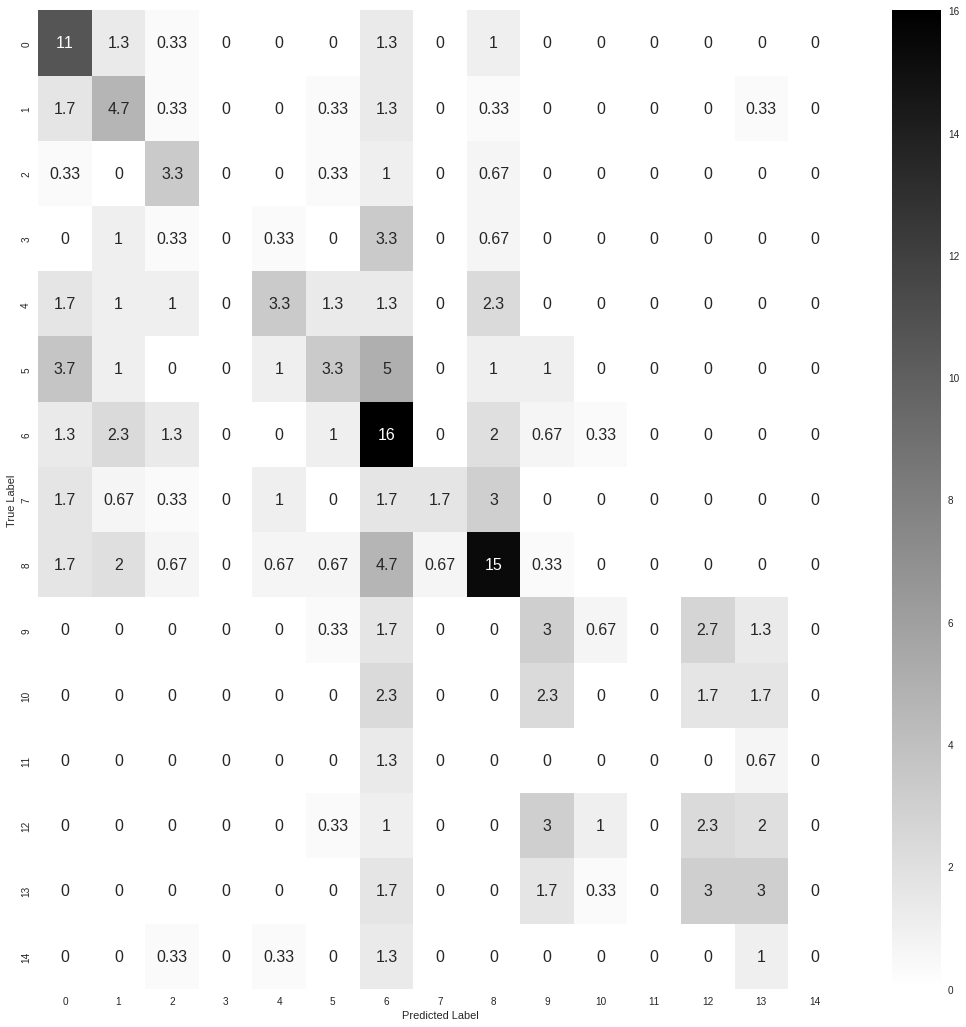

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001289,0.000150,0.009005,0.007069,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.373134,0.313433,0.402985,0.343284,0.333333,0.353234,0.031465,4
1,0.001629,0.000440,0.006967,0.004315,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.373134,0.313433,0.447761,0.358209,0.333333,0.365174,0.046094,1
2,0.001444,0.000357,0.005762,0.004928,25,uniform,"{'n_neighbors': 25, 'weights': 'uniform'}",0.373134,0.328358,0.432836,0.313433,0.333333,0.356219,0.043097,3
3,0.001598,0.000480,0.009599,0.006633,25,distance,"{'n_neighbors': 25, 'weights': 'distance'}",0.343284,0.343284,0.432836,0.343284,0.333333,0.359204,0.037017,2
4,0.001658,0.000413,0.026661,0.024576,30,uniform,"{'n_neighbors': 30, 'weights': 'uniform'}",0.343284,0.253731,0.477612,0.313433,0.303030,0.338218,0.075428,9
5,0.001510,0.000145,0.004396,0.003195,30,distance,"{'n_neighbors': 30, 'weights': 'distance'}",0.313433,0.298507,0.462687,0.328358,0.318182,0.344233,0.060002,6
6,0.001249,0.000134,0.005410,0.003363,35,uniform,"{'n_neighbors': 35, 'weights': 'uniform'}",0.358209,0.298507,0.447761,0.313433,0.333333,0.350249,0.052708,5
7,0.001808,0.000485,0.013654,0.015745,35,distance,"{'n_neighbors': 35, 'weights': 'distance'}",0.328358,0.313433,0.447761,0.313433,0.318182,0.344233,0.052050,6
8,0.001523,0.000356,0.012531,0.008321,40,uniform,"{'n_neighbors': 40, 'weights': 'uniform'}",0.313433,0.298507,0.432836,0.328358,0.318182,0.338263,0.048254,8
9,0.001571,0.000174,0.014222,0.014068,40,distance,"{'n_neighbors': 40, 'weights': 'distance'}",0.313433,0.298507,0.402985,0.313433,0.333333,0.332338,0.037017,10


In [161]:
# Seleção de atributos
X = df.iloc[:,0:18]
y = df.iloc[:,19]

# cross validation + gridsearch
parameters = { 'n_neighbors' : [20, 25, 30, 35, 40],
               'weights': ['uniform', 'distance']
        }
grid_search(StratifiedKFold(n_splits=3, random_state=default_seed, shuffle=True), KNeighborsClassifier(), parameters, X, y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        75
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        29
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        29
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        44
          16       1.00      1.00      1.00        27
          17       1.00    

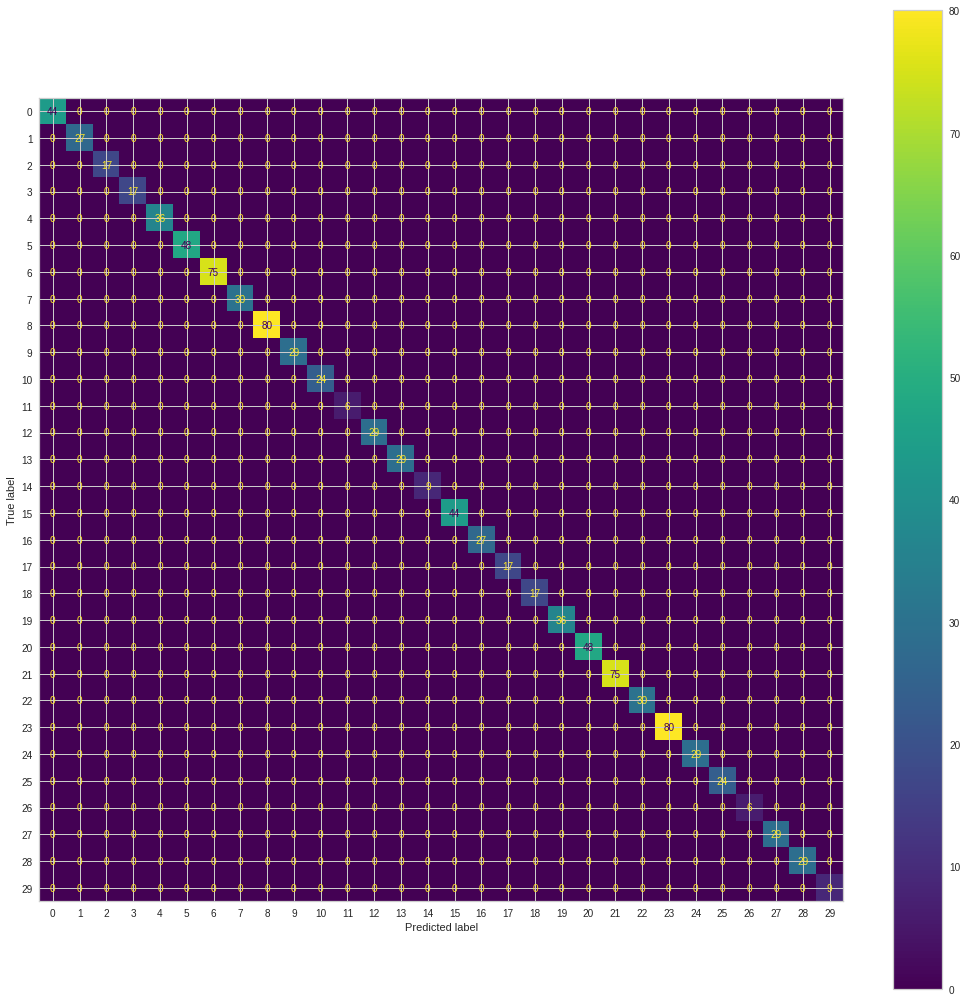

In [64]:
model_knn = KNeighborsClassifier(n_neighbors=30, weights='distance')

# Treinando o modelo
model_knn.fit(X, y)

# Predição
y_pred = model_knn.predict(X)

# Resultados do classificador
print(classification_report(y, y))

plot_confusion_matrix(model_knn, X, y)


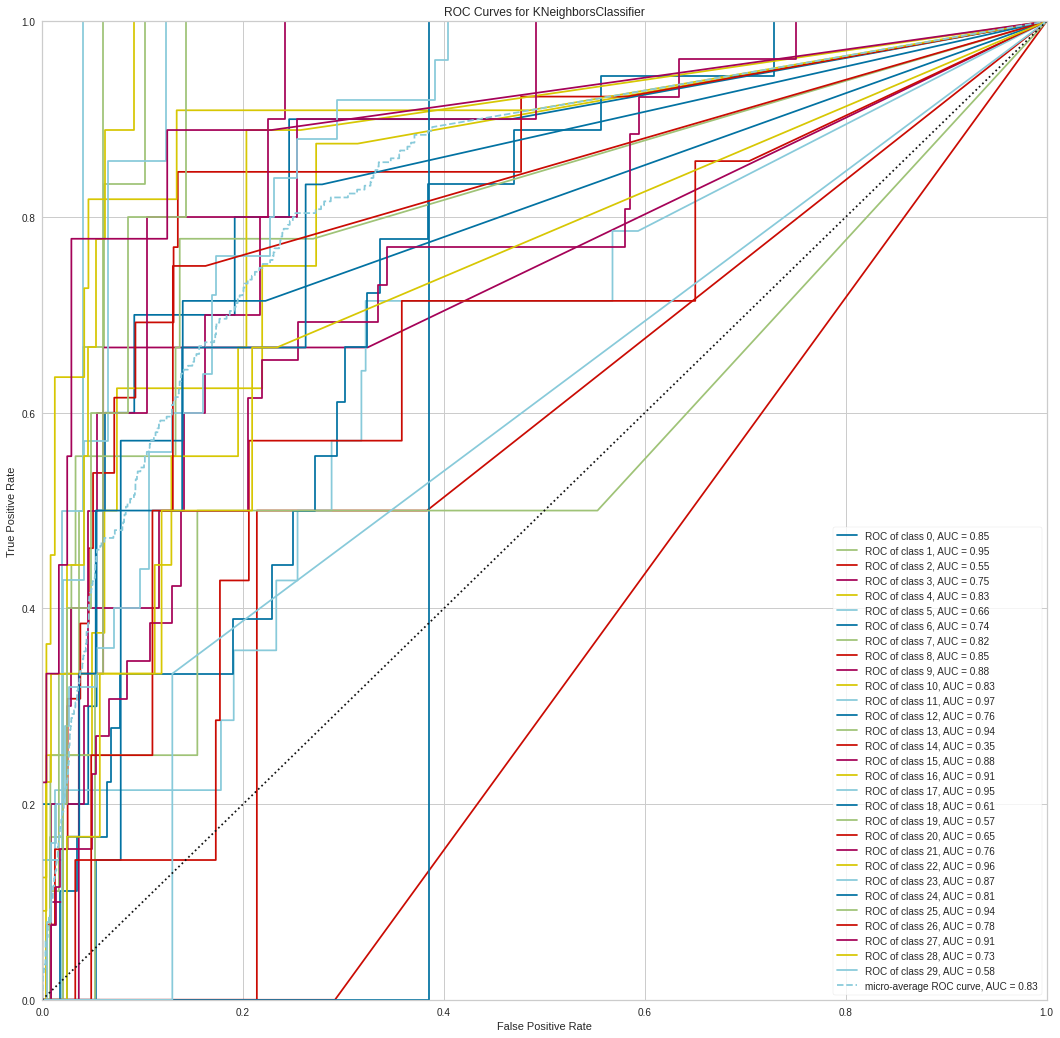

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [53]:
# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_knn, micro=True, macro=False)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## Decision Trees

In [19]:
# cross validation + gridsearch
parameters = {'min_samples_split': [10, 20, 30],
              'max_depth':[5, 10, 20, 50],
              'max_features':[5, 10, 15, 20]
             }
grid_search(StratifiedKFold(n_splits=10, random_state=default_seed, shuffle=True), DecisionTreeClassifier(), parameters, X_train, y_train)

Melhor parametro: {'max_depth': 50, 'max_features': 10, 'min_samples_split': 30}
Fold 0: 0.211
Melhor parametro: {'max_depth': 10, 'max_features': 15, 'min_samples_split': 30}
Fold 1: 0.263
Melhor parametro: {'max_depth': 50, 'max_features': 10, 'min_samples_split': 20}
Fold 2: 0.237
Melhor parametro: {'max_depth': 5, 'max_features': 20, 'min_samples_split': 20}
Fold 3: 0.263
Melhor parametro: {'max_depth': 50, 'max_features': 5, 'min_samples_split': 10}
Fold 4: 0.289
Melhor parametro: {'max_depth': 50, 'max_features': 15, 'min_samples_split': 30}
Fold 5: 0.243
Melhor parametro: {'max_depth': 50, 'max_features': 5, 'min_samples_split': 30}
Fold 6: 0.270
Melhor parametro: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 30}
Fold 7: 0.162
Melhor parametro: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 20}
Fold 8: 0.405
Melhor parametro: {'max_depth': 10, 'max_features': 10, 'min_samples_split': 10}
Fold 9: 0.162

Acurácia média (desvio) : 0.251 +- (0.066)
Melhores 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001748,0.000205,0.000901,0.000099,5,5,10,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.264706,0.294118,0.279412,0.268657,0.253731,0.272125,0.013727,23
1,0.001660,0.000082,0.000856,0.000020,5,5,20,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.235294,0.264706,0.176471,0.179104,0.253731,0.221861,0.037203,46
2,0.001580,0.000057,0.000884,0.000058,5,5,30,"{'max_depth': 5, 'max_features': 5, 'min_sampl...",0.279412,0.117647,0.294118,0.223881,0.358209,0.254653,0.080761,35
3,0.002201,0.000090,0.000859,0.000078,5,10,10,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.294118,0.308824,0.161765,0.328358,0.283582,0.275329,0.058740,17
4,0.002430,0.000470,0.001034,0.000312,5,10,20,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.279412,0.308824,0.235294,0.283582,0.268657,0.275154,0.023891,19
5,0.002064,0.000087,0.000876,0.000084,5,10,30,"{'max_depth': 5, 'max_features': 10, 'min_samp...",0.220588,0.235294,0.279412,0.238806,0.328358,0.260492,0.039144,29
6,0.002642,0.000084,0.000861,0.000064,5,15,10,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.323529,0.264706,0.220588,0.268657,0.298507,0.275198,0.034682,18
7,0.002556,0.000102,0.000838,0.000028,5,15,20,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.294118,0.294118,0.191176,0.238806,0.268657,0.257375,0.038870,33
8,0.002472,0.000108,0.000868,0.000038,5,15,30,"{'max_depth': 5, 'max_features': 15, 'min_samp...",0.294118,0.264706,0.264706,0.149254,0.283582,0.251273,0.052246,38
9,0.003142,0.000260,0.001010,0.000267,5,20,10,"{'max_depth': 5, 'max_features': 20, 'min_samp...",0.308824,0.250000,0.279412,0.268657,0.268657,0.275110,0.019333,20


              precision    recall  f1-score   support

           0       0.10      0.18      0.12        11
           1       0.11      0.33      0.17         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.57      0.40      0.47        10
           5       0.27      0.33      0.30        12
           6       0.40      0.40      0.40        20
           7       0.20      0.11      0.14         9
           8       0.33      0.37      0.35        19
           9       0.50      0.25      0.33         8
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00         2
          12       0.43      1.00      0.60         6
          13       0.14      0.17      0.15         6
          14       0.00      0.00      0.00         3

    accuracy                           0.29       125
   macro avg       0.20      0.24      0.20       125
weighted avg       0.27   

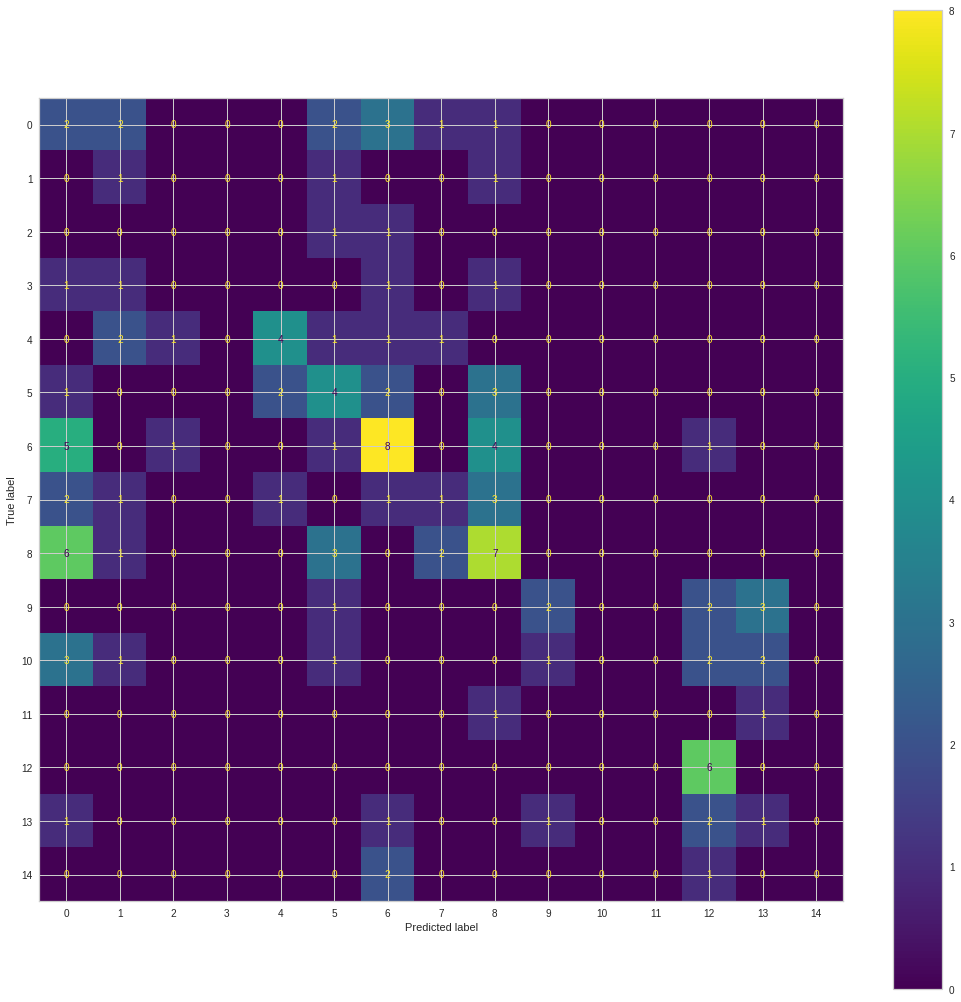

In [20]:
model_dt = DecisionTreeClassifier(max_depth=50, max_features=10, min_samples_split=20)

# Treinando o modelo
model_dt.fit(X_train, y_train)

# Predição
y_pred = model_dt.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

plot_confusion_matrix(model_dt, X_test, y_test)


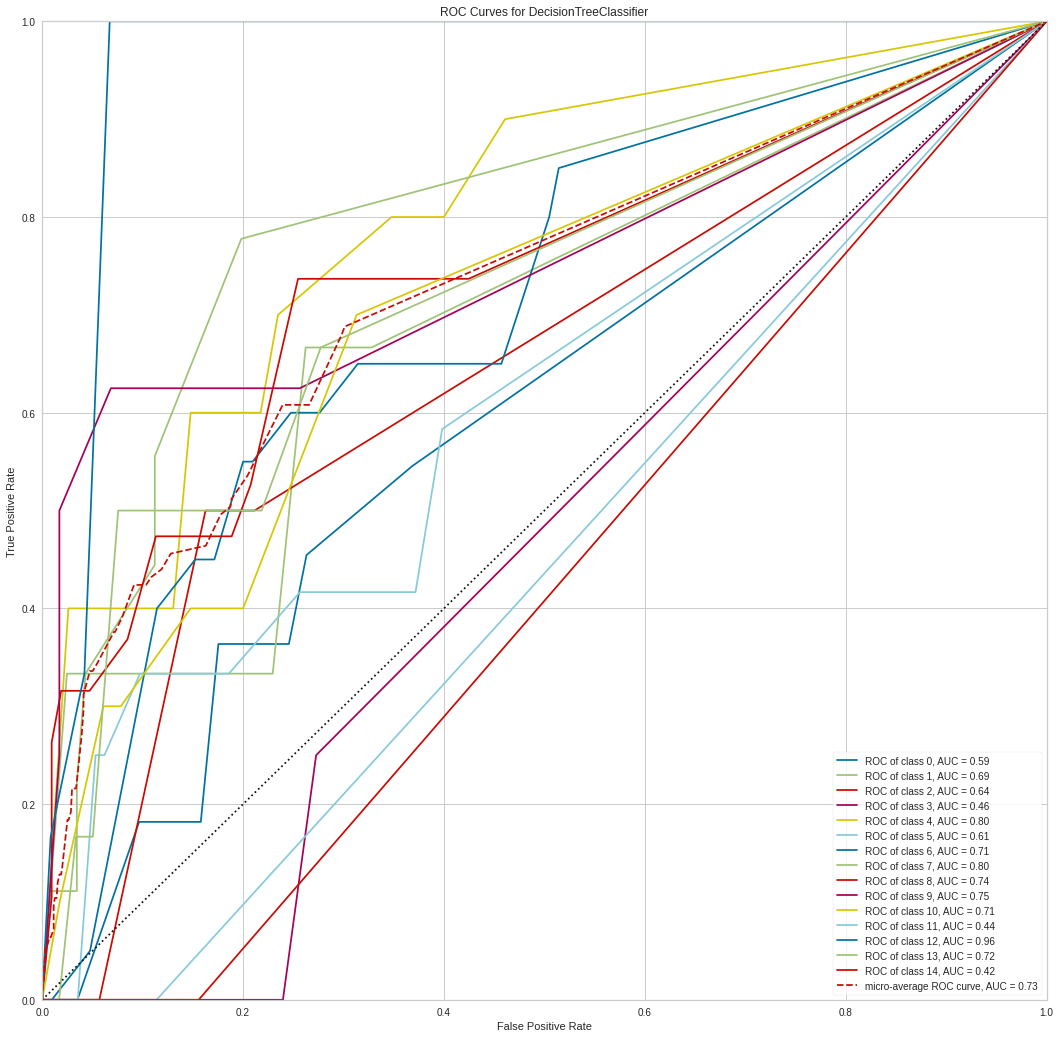

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [21]:
# Visualiza curvas ROC para cada parâmetro (one-vs-all)
visualizer = ROCAUC(model_dt, micro=True, macro=False)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

### Naïve Bayes

In [23]:
# cross validation + gridsearch
parameters = {'min_samples_split': [10, 20, 30],
              'max_depth':[5, 10, 20, 50],
              'max_features':[5, 10, 15, 20]
             }
grid_search(StratifiedKFold(n_splits=10, random_state=default_seed, shuffle=True), GaussianNB(), parameters, X_train, y_train)

ValueError: Invalid parameter 'max_depth' for estimator GaussianNB(). Valid parameters are: ['priors', 'var_smoothing'].

              precision    recall  f1-score   support

           0       0.25      0.30      0.27        10
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       1.00      0.38      0.55         8
           5       0.17      0.14      0.15        14
           6       0.14      0.28      0.19        18
           7       0.67      0.22      0.33         9
           8       0.13      0.62      0.21        13
           9       0.50      0.10      0.17        10
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         2
          12       0.11      0.14      0.12         7
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.12      0.10      0.11        10
          16       0.00      0.00      0.00        11
          17       0.00    

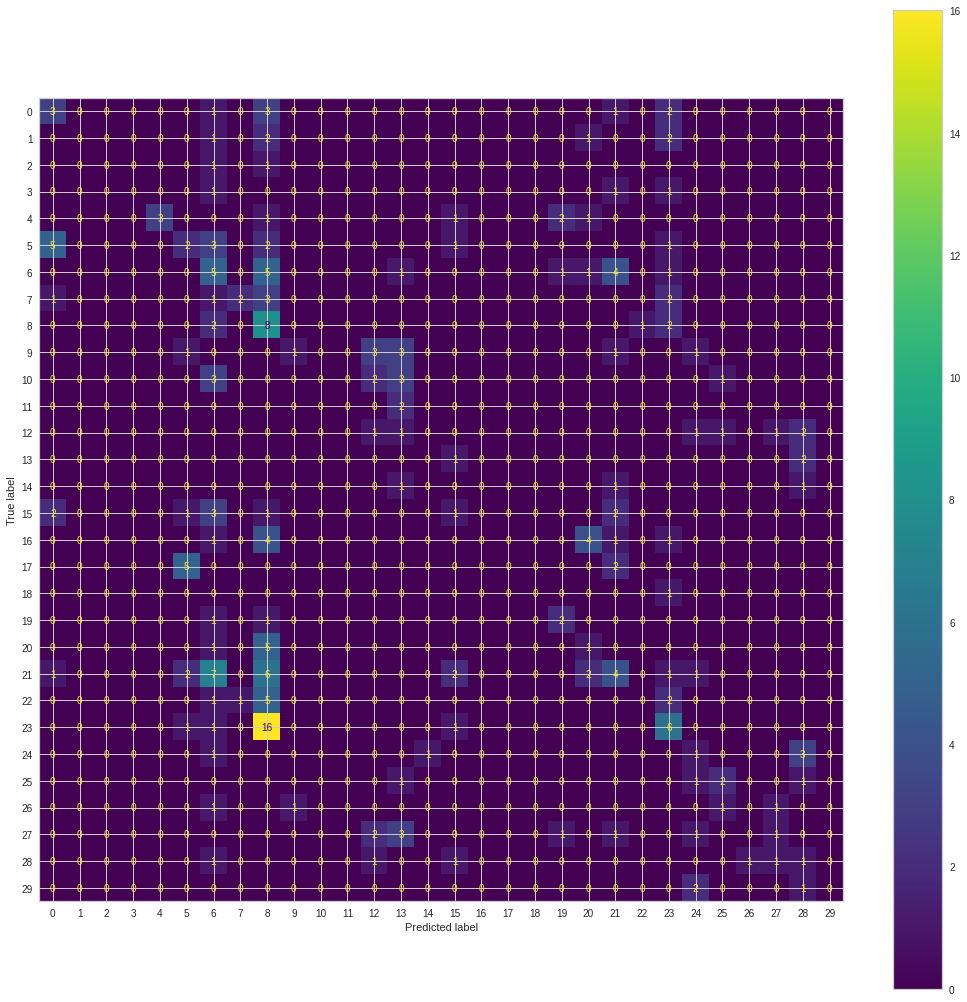

In [50]:
model_nb = MultinomialNB()

# Treinando o modelo
model_nb.fit(X_train, y_train)

# Predição
y_pred = model_nb.predict(X_test)

# Resultados do classificador
print(classification_report(y_test, y_pred))

plot_confusion_matrix(model_nb, X_test, y_test)
